### Prosper Loan Data Analysis Project

#### Introduction
This project is a part of Advanced Data Analysis by Udacity.we have used one of the curated data sets, provided by Udacity. It is the prosper loan data set, that contains information about loan listings and related variables including borrower as well as lender information. It contains variables related to Borrower such as credit rating, prosper rating,loan status ,loan amount,income range etc. Moreover, the dataset also has lender information.

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [34]:
loans = pd.read_csv("loans.csv")

### Distribution of Borrower APR

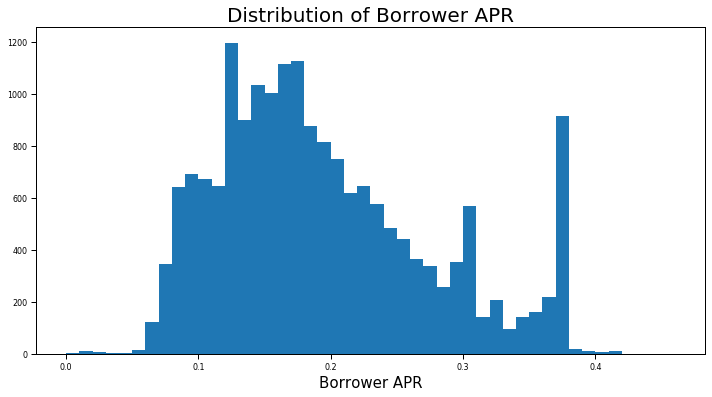

In [67]:
bins = np.arange(0, loans.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[12, 6])
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR',fontsize=15);
plt.title('Distribution of Borrower APR',fontsize=20);

The distribution of APR looks multimodal. A small peak centered almost at 0.06, a large peak centered at 0.18. There is also a small peak centered 0.31 and 0.33. Additionally, there is a very shape peak between 0.36 and 0.38. Only very few loans have APR greater than 0.4.

In [36]:
loans["BorrowerAPR"].describe()

count    18507.000000
mean         0.194840
std          0.080408
min          0.006530
25%          0.134110
50%          0.176770
75%          0.242640
max          0.413550
Name: BorrowerAPR, dtype: float64

### Distribution of DebtToIncomeRatio

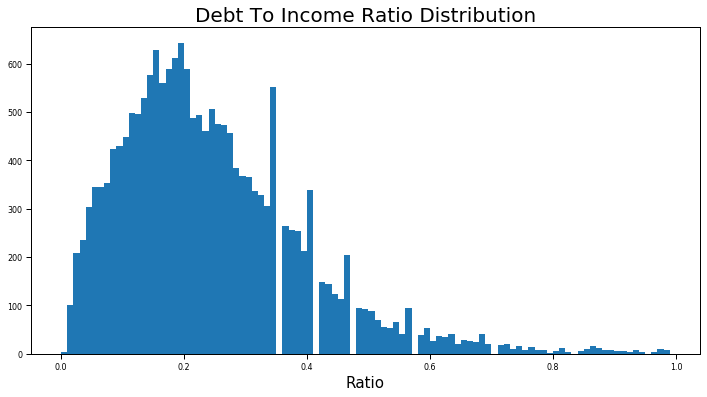

In [66]:
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[12, 6])
plt.hist(data = loans, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('Ratio',fontsize=15);
plt.title('Debt To Income Ratio Distribution',fontsize=20);

Distribution has unimodal peak around 0.2 with unusual peak around 0.35 which indicates most people prefer 1:3 ratio of debt to Income which is a good thing.

### Borrower APR vs. Loan Amount

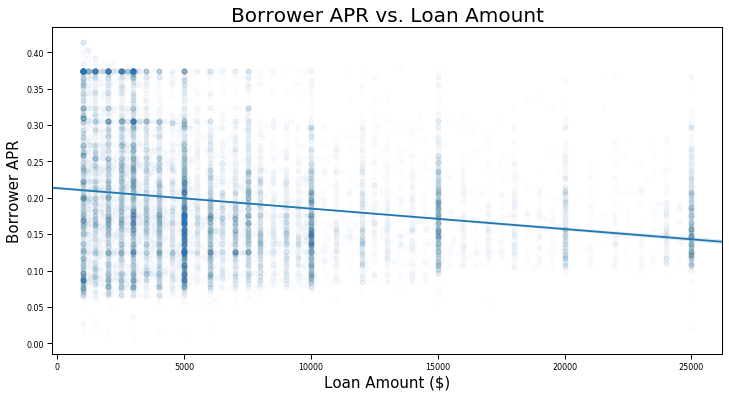

In [65]:
plt.figure(figsize = [12, 6])
sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)',fontsize=15)
plt.ylabel('Borrower APR',fontsize=15)
plt.title('Borrower APR vs. Loan Amount',fontsize=20);

The range of APR decrease with the increase of loan amount, the borrower APR decrease with increase of loan amount

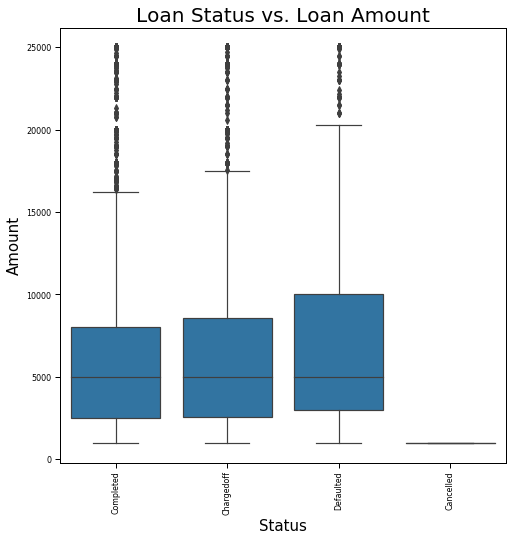

In [64]:
# LoanStatus vs ProsperScore
plt.figure(figsize = [8, 8])
loan_order = loans['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loans, x='LoanStatus', y='LoanOriginalAmount', color = base_color, order=loan_order)
plt.title('Loan Status vs. Loan Amount',fontsize=20)
plt.xlabel('Status',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The highest loans amount have the highest risk to Defaluted, they have the same median but Defaluted have the bigger range.

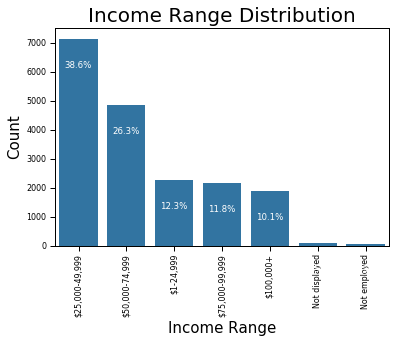

In [63]:
# create the plot
base_color = sb.color_palette()[0]
income_order = loans['IncomeRange'].value_counts().index
sb.countplot(data = loans, x = 'IncomeRange', color = base_color,order=income_order)

plt.title("Income Range Distribution",fontsize=20)
plt.xlabel("Income Range",fontsize=15)
plt.ylabel("Count",fontsize=15)
# add annotations
income_range_counts = loans["IncomeRange"].value_counts()

n_points = loans.shape[0]
locs, labels = plt.xticks(rotation = 90) # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = income_range_counts[label.get_text()]
    pct_string = '{:.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-1000, pct_string, ha = 'center', color = 'w')

The income rate distribution is analyzed to know the average income rate of listings. the plot shows that the loans fall when the income less than 50000 $

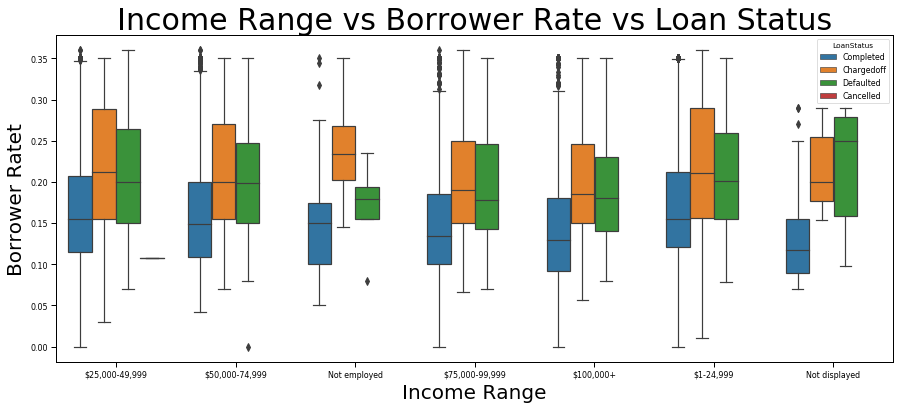

In [60]:
p = sb.boxplot(data=loans, x='IncomeRange', y='BorrowerRate',hue="LoanStatus");
p.set_title("Income Range vs Borrower Rate vs Loan Status",fontsize=30)
p.set_xlabel("Income Range",fontsize=20)
p.set_ylabel("Borrower Ratet",fontsize=20)
p.figure.set_figwidth(15)
p.figure.set_figheight(6)

I see when the interest rate for the loan is high,the chance for chargedOff or Defaulted is increased event with the people with high income range.

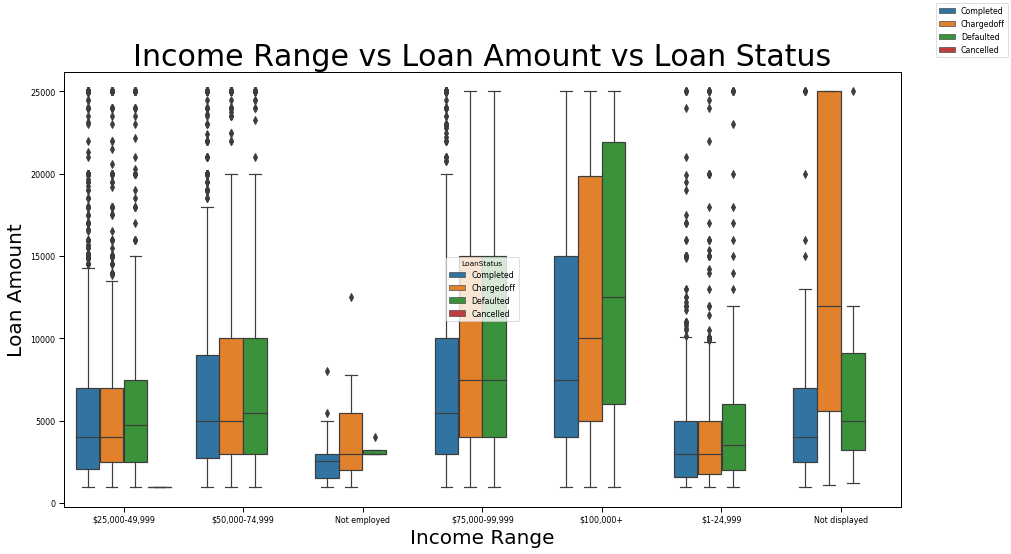

In [58]:
p = sb.boxplot(data=loans, x='IncomeRange', y='LoanOriginalAmount',hue="LoanStatus")
p.axes.set_title("Income Range vs Loan Amount vs Loan Status",fontsize=30)
p.set_xlabel("Income Range",fontsize=20)
p.set_ylabel("Loan Amount",fontsize=20)
p.figure.legend()
p.figure.set_figwidth(15)
p.figure.set_figheight(8)

As we see the highest loan amount increase chance to Defaluted ,the most Defaulted with borrowers have income more than +100,000 dollar 

In [44]:
## ! jupyter nbconvert loans_Explantory.ipynb --to slides --template output_toggle --post serve

### Summary :
In the exploration, I found several interesting relationships between the dependent variable (LoanSatus) and these features:
- income range or original loan amount, and borrower APR . I choose to present the loan statuses distribution and 
- its relationship with the variables listed above.

- Regarding the relationship between loan status and borrower APR, with a high APR increase the chance for Defaluted or Charged off.
- Additionally, employed borrowers had the highest amount of charged-off loans that borrowers under the remaining employment status  and the highest loan amount increase chance to Defaluted or Charged off,the most Defaulted with borrowers have income more than +100,000 dollar,which was the opposite of my expectations .
- Defaulted credits tend to be larger than completed for all Prosper ratings except the lowest ones.


In [45]:
! jupyter nbconvert loans_Explantory.ipynb --to slides --template output_toggle --post serve

[NbConvertApp] Converting notebook loans_Explantory.ipynb to slides
[NbConvertApp] Writing 662541 bytes to loans_Explantory.slides.html
[NbConvertApp] Serving local reveal.js
Traceback (most recent call last):
  File "C:\Users\Ahmad Abd Elhameed\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\U